# Test raw model values
- loads tas and pr datasets from historical CMIP6 model output files
- plots raw tas and pr values and climatology to test that no models have any issues

In [1]:
import xarray as xr, matplotlib.pyplot as plt
# import sys 
# sys.path.append('') # use this if the function file is in a different directory to the notebook
from importlib import reload # need to use this if I edit a function file
import os
import numpy as np
import pandas as pd
import cartopy.crs as ccrs # to add in continents and change map projections 
from matplotlib.colors import LinearSegmentedColormap # to change colour bar????

In [2]:
# dask allows you to check how long something is taking to load
import dask.diagnostics

In [3]:
# import custom functions
import sys 
sys.path.append('/g/data/w48/kb6999/Functions') # use this if the function file is in a different directory to the notebook

import frequently_used_functions as func
import plotting_functions as fplot
import model_functions as funcM
import reanalysis_functions as funcR

In [4]:
# store each section of the directory as a string
institution_dir = '/g/data/lp01/CMIP6/CMIP/'
tas_dir = '/historical/r1i1p1f1/Amon/tas/gr1.5/'
pr_dir = '/historical/r1i1p1f1/Amon/pr/gr1.5/'
print(institution_dir, tas_dir, pr_dir)

/g/data/lp01/CMIP6/CMIP/ /historical/r1i1p1f1/Amon/tas/gr1.5/ /historical/r1i1p1f1/Amon/pr/gr1.5/


In [6]:
models_tas = funcM.read_models(institution_dir, tas_dir, '1850-01','2015-01')

53 model paths found and loaded into the dictionary "models"
53 models have been successfully loaded into an xarray


In [7]:
models_pr = funcM.read_models(institution_dir, pr_dir, '1850-01','2015-01')

52 model paths found and loaded into the dictionary "models"
Path for MCM-UA-1-0 does not exist
51 models have been successfully loaded into an xarray


In [8]:
# make sure the models are the same for both vairables
# delete the height from the models_tas array (if it hasn't been deleted already)
if 'height' in models_tas:
    del models_tas['height']
# delete models that aren't common between variables
# models_tas = models_tas.where(models_tas.model.isin(models_pr.model), drop = True)
# models_pr = models_pr.where(models_pr.model.isin(models_tas.model), drop = True)
# #chekc that the models are the same for both variables and if so print True
# models_tas.model.equals(models_pr.model)

In [9]:
# combine precipitation and temperature into one dataset
models = xr.Dataset({'tas': models_tas.tas, 'pr': models_pr.pr})
# change the pr units
models['pr'] = models.pr*86400
models

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/dask/array/core.py:4402: PerformanceWarning: Increasing number of chunks by factor of 51
  result = blockwise(


,Array,Chunk
Bytes,11.26 GiB,1.32 MiB
Shape,"(53, 1980, 120, 240)","(1, 12, 120, 240)"
Count,35033 Tasks,8745 Chunks
Type,float32,numpy.ndarray
,Array,Chunk
Bytes,22.52 GiB,7.91 MiB
Shape,"(53, 1980, 120, 240)","(3, 12, 120, 240)"
Count,84637 Tasks,8415 Chunks
Type,float64,numpy.ndarray


In [11]:
# 43 models i'm using in my project, common to both tas and pr
models_43 = ['ACCESS-CM2','ACCESS-ESM1-5','AWI-CM-1-1-MR','AWI-ESM-1-1-LR','BCC-CSM2-MR','BCC-ESM1',
                             'CAMS-CSM1-0', 'CAS-ESM2-0', 'CESM2', 'CESM2-FV2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 
                             'CMCC-CM2-HR4', 'CMCC-CM2-SR5' ,'CanESM5', 'E3SM-1-1' ,'E3SM-1-1-ECA' ,'EC-Earth3', 
                             'EC-Earth3-AerChem' , 'EC-Earth3-Veg-LR', 'FGOALS-f3-L' ,'FGOALS-g3', 'FIO-ESM-2-0', 
                             'GFDL-CM4' ,'GFDL-ESM4', 'GISS-E2-1-G' ,'GISS-E2-1-G-CC', 'GISS-E2-1-H' ,'IITM-ESM', 
                             'INM-CM4-8', 'INM-CM5-0' ,'IPSL-CM6A-LR', 'KACE-1-0-G', 'MIROC6' ,'MPI-ESM-1-2-HAM',
                             'MPI-ESM1-2-LR' ,'MRI-ESM2-0', 'NESM3', 'NorCPM1' ,'NorESM2-LM', 'NorESM2-MM',
                             'SAM0-UNICON', 'TaiESM1']

In [12]:
# get rid of models with issues
models = models.sel(model= models_43)

In [13]:
# sort models alphabetically and prints final model list
models = models.sortby('model')
print(models.model.data)

['ACCESS-CM2' 'ACCESS-ESM1-5' 'AWI-CM-1-1-MR' 'AWI-ESM-1-1-LR'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CAMS-CSM1-0' 'CAS-ESM2-0' 'CESM2' 'CESM2-FV2'
 'CESM2-WACCM' 'CESM2-WACCM-FV2' 'CMCC-CM2-HR4' 'CMCC-CM2-SR5' 'CanESM5'
 'E3SM-1-1' 'E3SM-1-1-ECA' 'EC-Earth3' 'EC-Earth3-AerChem'
 'EC-Earth3-Veg-LR' 'FGOALS-f3-L' 'FGOALS-g3' 'FIO-ESM-2-0' 'GFDL-CM4'
 'GFDL-ESM4' 'GISS-E2-1-G' 'GISS-E2-1-G-CC' 'GISS-E2-1-H' 'IITM-ESM'
 'INM-CM4-8' 'INM-CM5-0' 'IPSL-CM6A-LR' 'KACE-1-0-G' 'MIROC6'
 'MPI-ESM-1-2-HAM' 'MPI-ESM1-2-LR' 'MRI-ESM2-0' 'NESM3' 'NorCPM1'
 'NorESM2-LM' 'NorESM2-MM' 'SAM0-UNICON' 'TaiESM1']


In [27]:
# area weighting 
models_w = models*np.cos(models_tas.lat*(np.pi/180))

In [28]:
# import land fraction data
landfrac_ds = xr.open_dataset('/g/data/w48/kb6999/Old_Models/landfraction_file_grid1.5.nc')
landmask = landfrac_ds.mean(dim='time')

/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/xarray/coding/times.py:119: SerializationWarning: Ambiguous reference date string: 1-01-01 01:00:00. The first value is assumed to be the year hence will be padded with zeros to remove the ambiguity (the padded reference date string is: 0001-01-01 01:00:00). To remove this message, remove the ambiguity by padding your reference date strings with zeros.
  warnings.warn(warning_msg, SerializationWarning)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/xarray/coding/times.py:527: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/g/data/hh5/public/apps/miniconda3/envs/analysis3-21.07/lib/python3.9/site-packages/xarray/core/indexing.py:419: SerializationWarning: Unable to decode time axi

In [29]:
# just renaming datasets so it's consistent with scott's notebook so I don't have to change the names and make mistakes
ds = models_w
pr = ds.pr
tas = ds.tas

# didn't use a landmask!!

In [30]:
# select out the asutralia region since it's our region of interest
pr_Aus = pr.sel(lat=slice(-50,-10), lon=slice(110,160)).sel(time=slice('18780801','18880831')).where(landmask.data==1, drop=True)
tas_Aus = tas.sel(lat=slice(-50,-10), lon=slice(110,160)).sel(time=slice('18780801','18880831')).where(landmask.data==1, drop=True)

In [31]:
# set the default font size
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

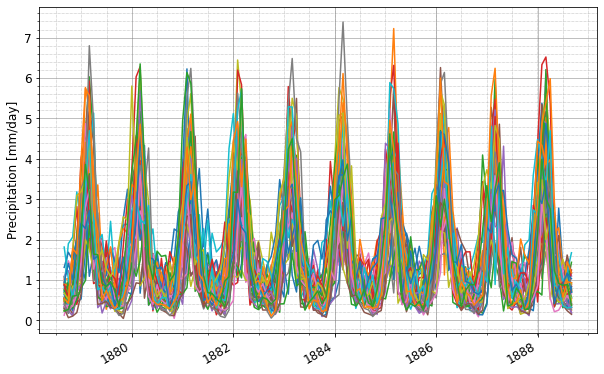

In [32]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10,6)) # make a figure

for i in range(pr_Aus.sizes['model']):
    pr_Aus.isel(model=i).mean(['lat','lon']).plot(label=i,axes=axes)

    
axes.grid(which='major', linestyle='-', linewidth='0.5', color='grey') # customise major grid
axes.minorticks_on() # need this line in order to get the minor grid lines 
axes.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
    
# remove xlabel
axes.set_xlabel(None)
axes.set_ylabel('Precipitation [mm/day]')
axes.set_title(None)

plt.savefig('M_seasonal_pr_raw.png', dpi=300, bbox_inches='tight')

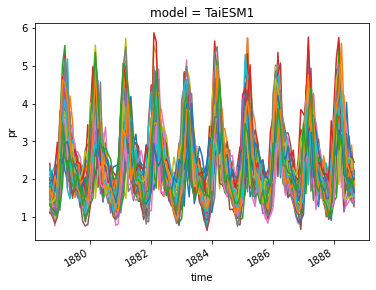

In [16]:
# check the raw pr values from the models by plotting all models
# note pr has a large range between models in the peak rainfall each season 
for i in range(pr_Aus.sizes['model']):
    pr_Aus.isel(model=i).mean(['lat','lon']).plot(label=i)
    
#plt.legend()

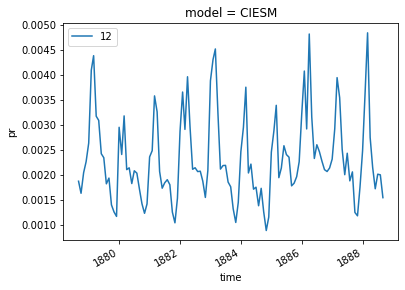

In [14]:
# finding the graph that appears to be 0 or at least too low 
pr_Aus.isel(model=12).mean(['lat','lon']).plot(label='12')
plt.legend()

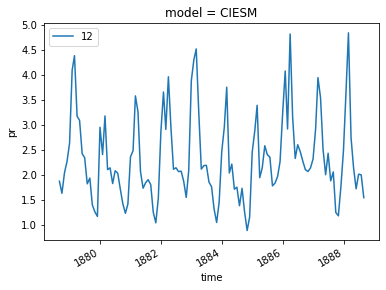

In [15]:
# now i've found the model is CIESM and it's not 0, but rather appears to be out by a factor of 1000
CIESM = pr_Aus.isel(model=12).mean(['lat','lon'])
times_1000 = CIESM*1000
times_1000.plot(label='12')
plt.legend()

In [23]:

with dask.diagnostics.ProgressBar():
    pr_climatology = pr.sel(time=slice('18500101','18801231')).groupby('time.month').mean().load()

[########################################] | 100% Completed |  1min 18.5s


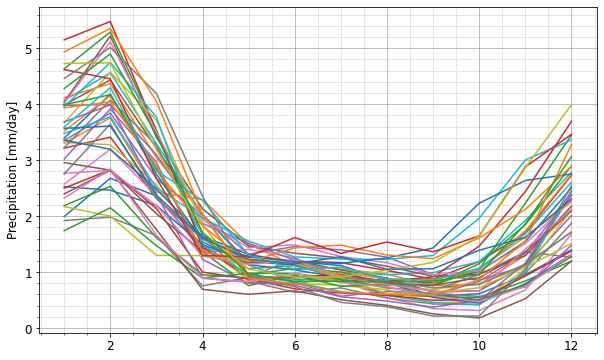

In [33]:
# Monthly temperature anomalies stacked
fig, axes = plt.subplots(1, 1, sharex=True, figsize=(10,6)) # make a figure

for i in range(pr_Aus.sizes['model']):
    pr_clim_aus = pr_climatology.sel(lat=slice(-50,-10), lon=slice(110,160)).where(landmask.data==1, drop=True).isel(model=i).mean(['lat','lon'])
    pr_clim_aus.plot(label=i,axes=axes)

    
axes.grid(which='major', linestyle='-', linewidth='0.5', color='grey') # customise major grid
axes.minorticks_on() # need this line in order to get the minor grid lines 
axes.grid(which='minor', linestyle=':', linewidth='0.5', color='grey')
    
# remove xlabel
axes.set_xlabel(None)
axes.set_ylabel('Precipitation [mm/day]')
axes.set_title(None)

plt.savefig('M_seasonal_pr_clim.png', dpi=300, bbox_inches='tight')

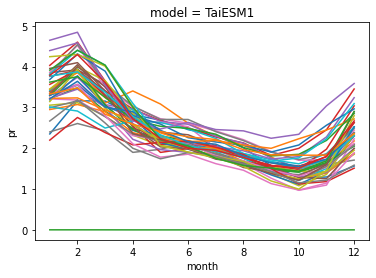

In [17]:
for i in range(pr_Aus.sizes['model']):
    pr_climatology.sel(lat=slice(-50,-10), lon=slice(110,160)).isel(model=i).mean(['lat','lon']).plot()

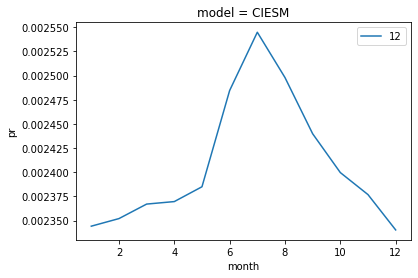

In [18]:
# plot the model CIESM that appears to be too low 
pr_climatology.isel(model=12).mean(['lat','lon']).plot(label='12')
plt.legend()

In [19]:
# eliminate odd models and plot again to make sure everthing looks ok
pr_Aus = pr_Aus.drop_sel(model=['CIESM'])

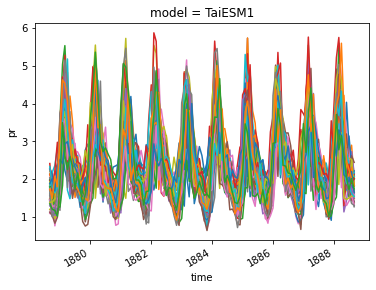

In [20]:
# check the raw pr values from the models by plotting all models
# note pr has a large range between models in the peak rainfall each season 
for i in range(pr_Aus.sizes['model']):
    pr_Aus.isel(model=i).mean(['lat','lon']).plot(label=i)
    

# Temperature

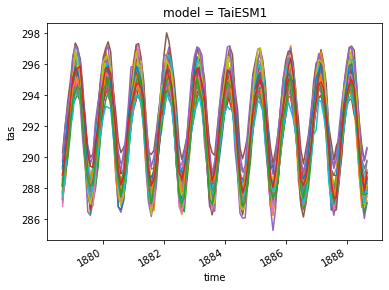

In [21]:
# plot the raw temperature values for each model 
for i in range(tas_Aus.sizes['model']):
    tas_Aus.isel(model=i).mean(['lat','lon']).plot()

In [22]:
# define climatology and so I can test that it's fine too 
tas_climatology = tas.sel(time=slice('18500101','18801231')).groupby('time.month').mean()

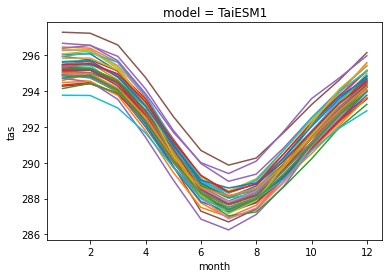

In [23]:
# plot the climatology for temperature and ensure that no models have issues
for i in range(tas_Aus.sizes['model']):
    tas_climatology.sel(lat=slice(-50,-10), lon=slice(110,160)).isel(model=i).mean(['lat','lon']).plot()